COMP0189: Applied Artificial Intelligence
# Week 7 (Dimensionality reduction and matrix decomposition)

### 🎯 Objectives
1. To use principal component analysis to extract latent features from an image dataset
2. To understand the differences in applying various dimensionality reduction techniques like Principal Component Analysis (PCA), Independent Component Analysis (ICA), Non-negative Matrix Factorization (NMF)
3. To apply cross decomposition methods like Canonical Correlation Analysis (CCA) and PArtial Least Squares (PLS) to find the fundamental relations between two matrices (X and Y) that represent different views of the same data

- Part 1: "Labeled Faces in the Wild" dataset
- Part 2: OASIS dataset  

### Acknowledgements
- https://scikit-learn.org/stable/
- https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
- https://oasis-brains.org

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## 🧑‍💻 Part 1. Face recognition through eigenfaces and SVMs

### 📝 Task 1.1 Import Libraries and Load the Labeled Faces in the Wild (LFW) People Dataset (Classification)

In [ ]:
from time import time
import matplotlib.pyplot as plt
from scipy.stats import loguniform
import numpy as np

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA, NMF, FastICA
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

# Load data
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
n_features = X.shape[1]

# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Standardize features by removing the mean and scaling to unit variance
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Replace StandardScaler with MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

### 📝 Task 1.2 Define Helper Functions

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits."""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return f"predicted: {pred_name}\ntrue:      {true_name}"


### 📝 Task 1.3 Apply PCA, NMF, and ICA

In [ ]:
n_components = 50

# PCA
print("Extracting the top %d eigenfaces from %d faces using PCA" % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
print("PCA done in %0.3fs" % (time() - t0))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# NMF
print("Extracting the top non-negative compoments using NMF")
t0 = time()
nmf = NMF(n_components=n_components, init='nndsvda', random_state=0)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)
print("NMF done in %0.3fs" % (time() - t0))

# ICA
print("Extracting the top independent components using ICA")
t0 = time()
ica = FastICA(n_components=n_components, random_state=0, max_iter=400, whiten= "unit-variance")
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)
print("ICA done in %0.3fs" % (time() - t0))


Extracting the top 50 eigenfaces from 966 faces using PCA
PCA done in 0.388s
Extracting the top non-negative compoments using NMF


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF done in 6.789s
Extracting the top independent components using ICA
ICA done in 2.083s


### 📝 Task 1.4 Train SVM Classifier using the Components Extraced by the Different Method and Evaluate

Fitting the classifier to the training set using PCA
done in 3.421s
Best estimator found by grid search:
SVC(C=73713.93813423549, class_weight='balanced', gamma=0.009783442989140318)
Predicting people's names on the test set using PCA
done in 0.018s
                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.77      0.77        13
     Colin Powell       0.78      0.88      0.83        60
  Donald Rumsfeld       0.62      0.59      0.60        27
    George W Bush       0.88      0.88      0.88       146
Gerhard Schroeder       0.65      0.68      0.67        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.76      0.69      0.72        36

         accuracy                           0.80       322
        macro avg       0.75      0.73      0.74       322
     weighted avg       0.80      0.80      0.80       322



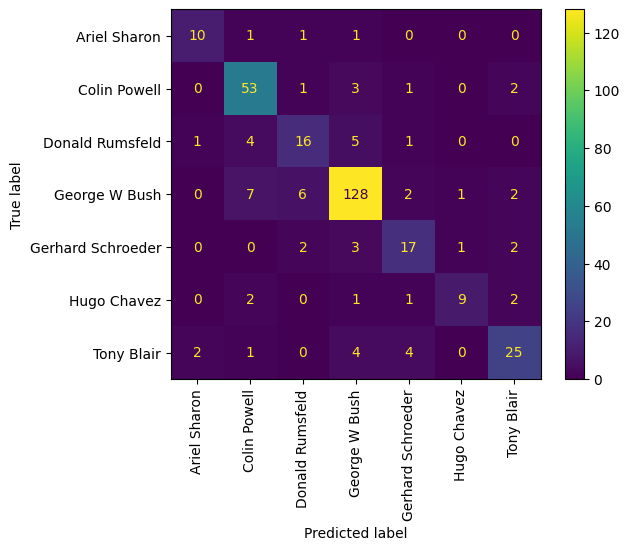

Fitting the classifier to the training set using NMF
done in 3.991s
Best estimator found by grid search:
SVC(C=13516.245077968015, class_weight='balanced', gamma=0.0739451041420958)
Predicting people's names on the test set using NMF
done in 0.019s
                   precision    recall  f1-score   support

     Ariel Sharon       0.32      0.69      0.44        13
     Colin Powell       0.60      0.78      0.68        60
  Donald Rumsfeld       0.57      0.59      0.58        27
    George W Bush       0.93      0.68      0.79       146
Gerhard Schroeder       0.59      0.68      0.63        25
      Hugo Chavez       0.44      0.73      0.55        15
       Tony Blair       0.69      0.50      0.58        36

         accuracy                           0.68       322
        macro avg       0.59      0.67      0.61       322
     weighted avg       0.74      0.68      0.69       322



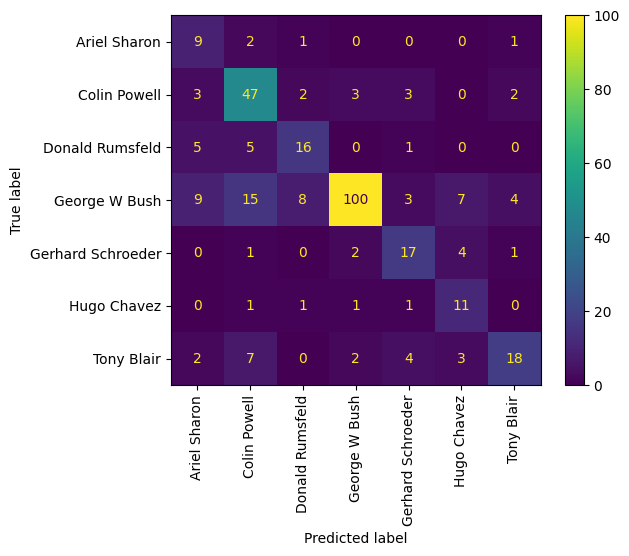

Fitting the classifier to the training set using ICA
done in 3.529s
Best estimator found by grid search:
SVC(C=2707.7291125602837, class_weight='balanced', gamma=0.01703500437617551)
Predicting people's names on the test set using ICA
done in 0.040s
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.69      0.82        13
     Colin Powell       0.82      0.92      0.87        60
  Donald Rumsfeld       0.68      0.56      0.61        27
    George W Bush       0.83      0.92      0.87       146
Gerhard Schroeder       0.76      0.64      0.70        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.74      0.64      0.69        36

         accuracy                           0.81       322
        macro avg       0.81      0.71      0.75       322
     weighted avg       0.81      0.81      0.80       322



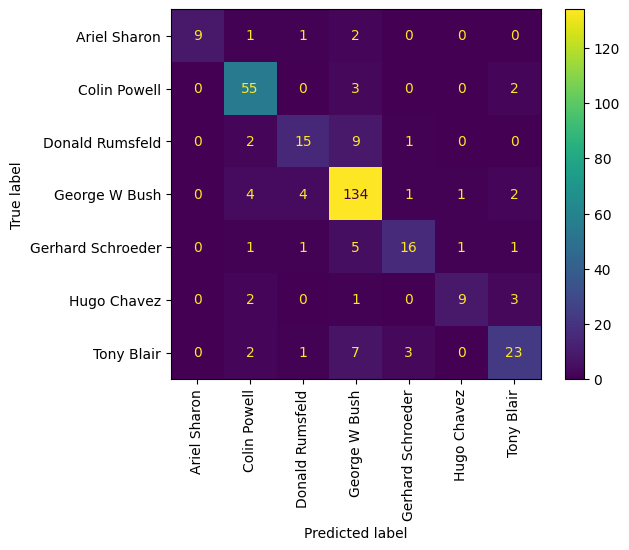

In [ ]:
def train_and_evaluate(X_train, X_test, y_train, y_test, method_name):
    print(f"Fitting the classifier to the training set using {method_name}")
    t0 = time()
    param_grid = {"C": loguniform(1e3, 1e5), "gamma": loguniform(1e-4, 1e-1)}
    clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10)
    clf = clf.fit(X_train, y_train)
    print(f"done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

    print(f"Predicting people's names on the test set using {method_name}")
    t0 = time()
    y_pred = clf.predict(X_test)
    print(f"done in %0.3fs" % (time() - t0))

    print(classification_report(y_test, y_pred, target_names=target_names))
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=target_names, xticks_rotation='vertical')
    plt.show()

# Train and evaluate for PCA
train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test, "PCA")

# Train and evaluate for NMF
train_and_evaluate(X_train_nmf, X_test_nmf, y_train, y_test, "NMF")

# Train and evaluate for ICA
train_and_evaluate(X_train_ica, X_test_ica, y_train, y_test, "ICA")

### 📝 Task 1.5 Visualize Results

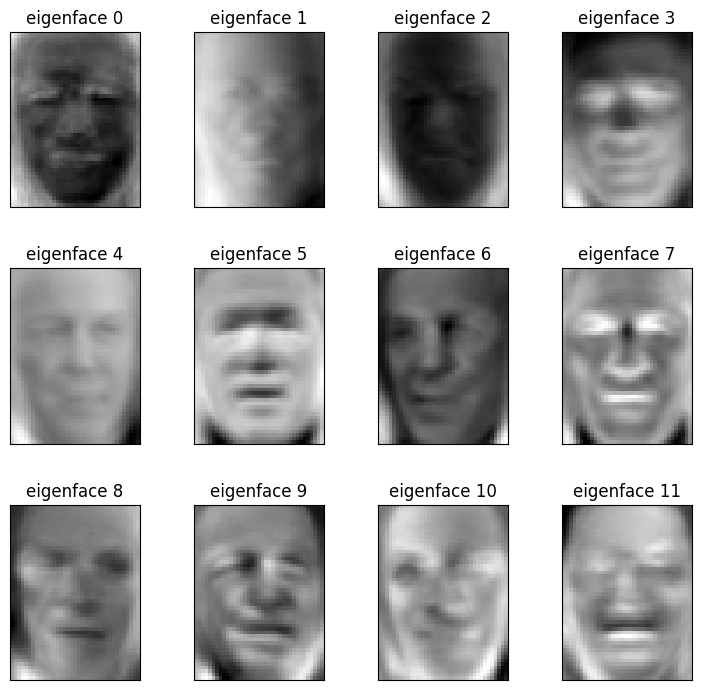

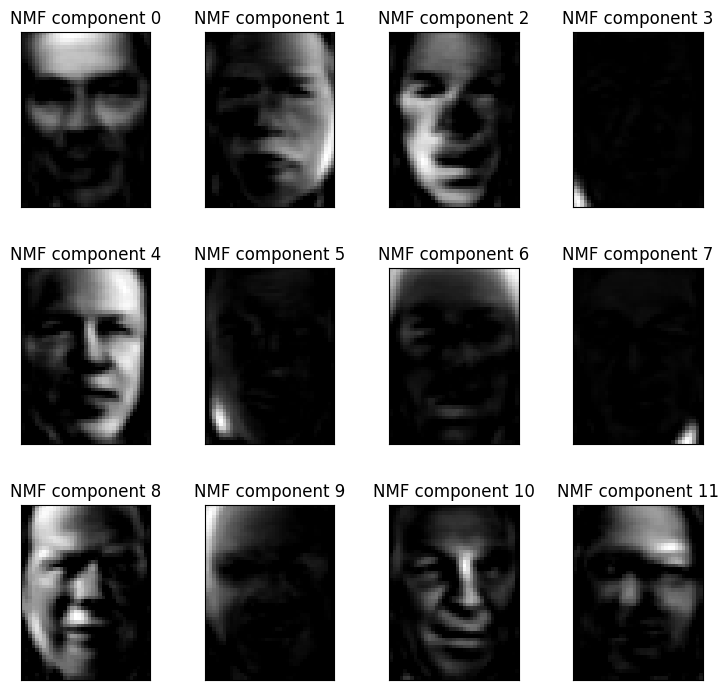

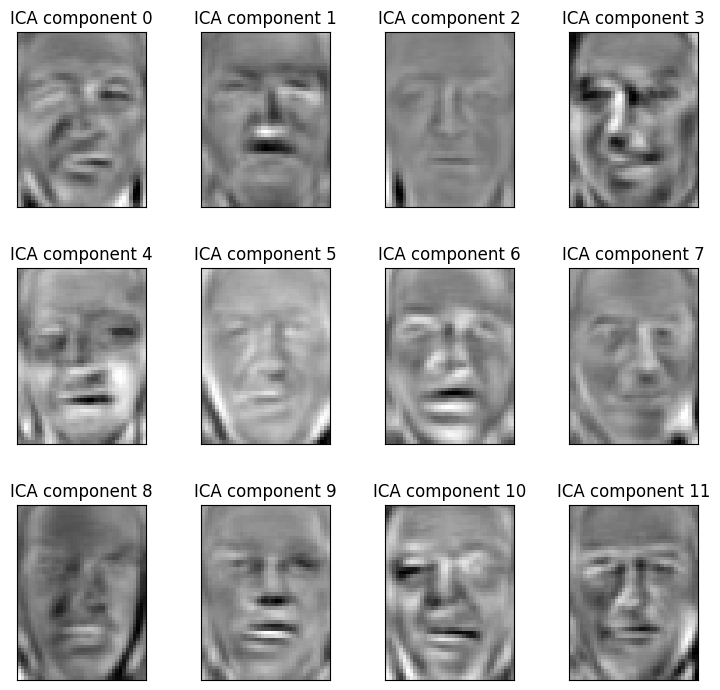

In [ ]:
# Visualize PCA components
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

# Visualize NMF components
nmf_faces = nmf.components_.reshape((n_components, h, w))
nmf_titles = ["NMF component %d" % i for i in range(nmf_faces.shape[0])]
plot_gallery(nmf_faces, nmf_titles, h, w)

# Visualize ICA components
ica_faces = ica.components_.reshape((n_components, h, w))
ica_titles = ["ICA component %d" % i for i in range(ica_faces.shape[0])]
plot_gallery(ica_faces, ica_titles, h, w)

### 🗣 Discuss:
- What are the differences in how PCA, NMF, and ICA capture features.
- How do these differences affect the performance of the SVM classifier.

## 👩‍💻 Part 2: OASIS dataset: Cross decomposition methods

In this part, you will learn how to apply cross decomposition methods such as CCA and PLSSVD to find the fundamental relations (or latent dimensions) between two matrices (X and Y) that represent different views of the same data.

We will use the Open Access Series of Imaging Studies (OASIS) dataset, which contains brain Magnetic Resonance Images (MRI) (view 1) and clinical assessments (view 2) of 416 subjects aged 18 to 96. The brain images have been summarized into 116 Regioes of Interest (ROIs) using the Automated Anatomical Labeling (AAL) atlas (https://www.gin.cnrs.fr/en/tools/aal/) . The clinical data consist of tabular data including gender, age, education and two clinical questionnairs, the mini mental state examination (MMSE) and the clinical dementia rating (CDR). The goal is to explore how these two views are related.

OASIS dataset

In this part, you will learn how to apply cross decomposition methods such as CCA and PLSSVD to find the fundamental relations between two matrices (X and Y) that represent different views of the same data.

We will use the OASIS dataset, which contains brain MRI images (view 1) and clinical assessments (view 2) of 416 subjects aged 18 to 96. The goal is to explore how these two views are related.

### Import libraries and load data

First, we need to import some libraries and load the data from CSV files.

In [32]:
import numpy as np
import pandas as pd

from sklearn.cross_decomposition import CCA, PLSSVD
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


labels = pd.read_csv("/content/OASIS_labels.csv")
brain_roi = pd.read_csv("/content/OASIS_view1_ROI.csv")
clinical = pd.read_csv("/content/OASIS_view2_clinical.csv")
roi_names = pd.read_csv("/content/AAL_ROI_names.csv", header=None).squeeze()

In [33]:
clinical

,Subject ID,Gender,Age,EDUC,MMSE,CDR
0,OAS2_0001,M,87,14,27,0.0
1,OAS2_0005,M,80,12,28,0.0
2,OAS2_0007,M,71,16,28,0.5
3,OAS2_0010,F,66,12,30,0.5
4,OAS2_0013,F,81,12,30,0.0
...,...,...,...,...,...,...
95,OAS2_0177,M,68,14,26,0.0
96,OAS2_0181,F,74,12,26,0.5
97,OAS2_0183,F,66,13,30,0.0
98,OAS2_0184,F,72,16,24,0.5


### Data preprocessing

Next, we need to do some preprocessing on the data. We will drop some columns that are not relevant for our analysis, such as subject ID, gender, handness, etc. We will also normalize each view by subtracting its mean and dividing by its standard deviation.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

brain_roi = brain_roi.drop(["Subject ID"], axis=1)
clinical = clinical.drop(["Subject ID"], axis=1)

# One-hot encode the "Gender" column and drop the first column to avoid multicollinearity
clinical = pd.get_dummies(clinical, columns=["Gender"], drop_first=True)

# Fill nans with mean values
brain_roi = brain_roi.fillna(brain_roi.mean(numeric_only=True))
clinical = clinical.fillna(clinical.mean(numeric_only=True))

# Convert labels to numbers before the split
label_dict = {"Demented": 0, "Nondemented": 1}
labels["Group"] = labels["Group"].map(label_dict)

# Split the data and labels into training and testing sets
train_brain_roi, test_brain_roi, train_clinical, test_clinical, train_labels, test_labels = train_test_split(
    brain_roi, clinical, labels["Group"], test_size=0.3, random_state=42)

# Apply StandardScaler separately to training and testing sets to avoid data leakage
scaler_brain = StandardScaler()
train_brain_roi = scaler_brain.fit_transform(train_brain_roi)
test_brain_roi = scaler_brain.transform(test_brain_roi)

scaler_clinical = StandardScaler()
train_clinical = scaler_clinical.fit_transform(train_clinical)
test_clinical = scaler_clinical.transform(test_clinical)


In [35]:
brain_roi

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_107,ROI_108,ROI_109,ROI_110,ROI_111,ROI_112,ROI_113,ROI_114,ROI_115,ROI_116
0,0.328376,0.310736,0.331466,0.365400,0.473319,0.513658,0.365515,0.426603,0.435912,0.491478,...,0.158964,0.117107,0.343077,0.332691,0.476891,0.525261,0.610925,0.692715,0.666304,0.212833
1,0.265462,0.284931,0.280695,0.311896,0.317296,0.329173,0.288063,0.330815,0.278311,0.296520,...,0.149029,0.131028,0.329705,0.320142,0.462999,0.478867,0.563096,0.683033,0.587780,0.198033
2,0.254751,0.257339,0.292834,0.264672,0.398141,0.351934,0.317767,0.328207,0.358854,0.375535,...,0.137343,0.118622,0.379502,0.330435,0.380093,0.441531,0.554831,0.641267,0.561768,0.213696
3,0.280047,0.297505,0.291329,0.323008,0.429695,0.414882,0.343897,0.357219,0.412683,0.423509,...,0.127153,0.134607,0.309793,0.273754,0.345968,0.414761,0.449908,0.512534,0.506002,0.157815
4,0.247047,0.241039,0.245281,0.240963,0.348234,0.325550,0.276698,0.275589,0.355991,0.335164,...,0.132554,0.109551,0.288043,0.255369,0.305809,0.338685,0.404975,0.449699,0.381659,0.154141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.283958,0.283804,0.274866,0.275195,0.436282,0.429009,0.310347,0.371561,0.392171,0.405194,...,0.168741,0.150855,0.355952,0.340494,0.468567,0.547288,0.661266,0.681692,0.561343,0.204061
96,0.219749,0.229720,0.231304,0.236867,0.311941,0.290046,0.240077,0.255363,0.284920,0.335230,...,0.129547,0.129192,0.367391,0.337985,0.400780,0.429753,0.546856,0.561667,0.460930,0.187182
97,0.260072,0.245813,0.275967,0.263345,0.363978,0.356836,0.294807,0.303855,0.345023,0.368028,...,0.100847,0.105040,0.311794,0.314821,0.411738,0.452949,0.534124,0.613260,0.545518,0.197639
98,0.307017,0.306713,0.242192,0.303062,0.371719,0.372836,0.327543,0.367935,0.379560,0.388705,...,0.104170,0.122919,0.292791,0.264992,0.319118,0.369786,0.451831,0.471996,0.432581,0.164918


In [36]:
brain_roi.columns = roi_names
brain_roi

,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Cerebelum_10_L,Cerebelum_10_R,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10
0,0.328376,0.310736,0.331466,0.365400,0.473319,0.513658,0.365515,0.426603,0.435912,0.491478,...,0.158964,0.117107,0.343077,0.332691,0.476891,0.525261,0.610925,0.692715,0.666304,0.212833
1,0.265462,0.284931,0.280695,0.311896,0.317296,0.329173,0.288063,0.330815,0.278311,0.296520,...,0.149029,0.131028,0.329705,0.320142,0.462999,0.478867,0.563096,0.683033,0.587780,0.198033
2,0.254751,0.257339,0.292834,0.264672,0.398141,0.351934,0.317767,0.328207,0.358854,0.375535,...,0.137343,0.118622,0.379502,0.330435,0.380093,0.441531,0.554831,0.641267,0.561768,0.213696
3,0.280047,0.297505,0.291329,0.323008,0.429695,0.414882,0.343897,0.357219,0.412683,0.423509,...,0.127153,0.134607,0.309793,0.273754,0.345968,0.414761,0.449908,0.512534,0.506002,0.157815
4,0.247047,0.241039,0.245281,0.240963,0.348234,0.325550,0.276698,0.275589,0.355991,0.335164,...,0.132554,0.109551,0.288043,0.255369,0.305809,0.338685,0.404975,0.449699,0.381659,0.154141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.283958,0.283804,0.274866,0.275195,0.436282,0.429009,0.310347,0.371561,0.392171,0.405194,...,0.168741,0.150855,0.355952,0.340494,0.468567,0.547288,0.661266,0.681692,0.561343,0.204061
96,0.219749,0.229720,0.231304,0.236867,0.311941,0.290046,0.240077,0.255363,0.284920,0.335230,...,0.129547,0.129192,0.367391,0.337985,0.400780,0.429753,0.546856,0.561667,0.460930,0.187182
97,0.260072,0.245813,0.275967,0.263345,0.363978,0.356836,0.294807,0.303855,0.345023,0.368028,...,0.100847,0.105040,0.311794,0.314821,0.411738,0.452949,0.534124,0.613260,0.545518,0.197639
98,0.307017,0.306713,0.242192,0.303062,0.371719,0.372836,0.327543,0.367935,0.379560,0.388705,...,0.104170,0.122919,0.292791,0.264992,0.319118,0.369786,0.451831,0.471996,0.432581,0.164918


In [37]:
clinical

,Age,EDUC,MMSE,CDR,Gender_M
0,87,14,27,0.0,1
1,80,12,28,0.0,1
2,71,16,28,0.5,1
3,66,12,30,0.5,0
4,81,12,30,0.0,0
...,...,...,...,...,...
95,68,14,26,0.0,1
96,74,12,26,0.5,0
97,66,13,30,0.0,0
98,72,16,24,0.5,0


### Cross decomposition methods

Now we are ready to apply cross decomposition methods to find the relations between the two views. We will use two methods: CCA and PLSSVD.

CCA finds linear combinations of X and Y that have maximum correlation. It can be seen as a generalization of PCA for two sets of variables.

PLSSVD finds linear combinations of X and Y that have maximum covariance. It can be seen as a generalization of SVD for two sets of variables.

For both methods, we need to specify the number of components (n_components) that we want to extract from each view. This parameter controls the dimensionality of the latent space.

We will use n_components=2 for both methods. You can try different values later and see how they affect the results.

For further comparison, apply PCA to the brain_roi data with 2 components in order to see if combining the modalities improves the latent space.

### Task 4 - Apply CCA to the brain and clinical dataset and plot the two first CCA components (brain and clinical)

In [38]:
CCA_n_components = 2
# Create CCA object with n_components=2
cca = CCA(n_components=CCA_n_components)

# Fit CCA model on X (brain_roi) and Y (clinical)
cca.fit(train_brain_roi, train_clinical)

# Transform X and Y into their latent representations using CCA
X_c_train, Y_c_train = cca.transform(train_brain_roi, train_clinical)
X_c_test, Y_c_test = cca.transform(test_brain_roi, test_clinical)

In [39]:
X_c_train.shape, Y_c_train.shape

((70, 2), (70, 2))

In [40]:
brain_region_names = brain_roi.columns.tolist()
clinical_variable_names = clinical.columns.tolist()


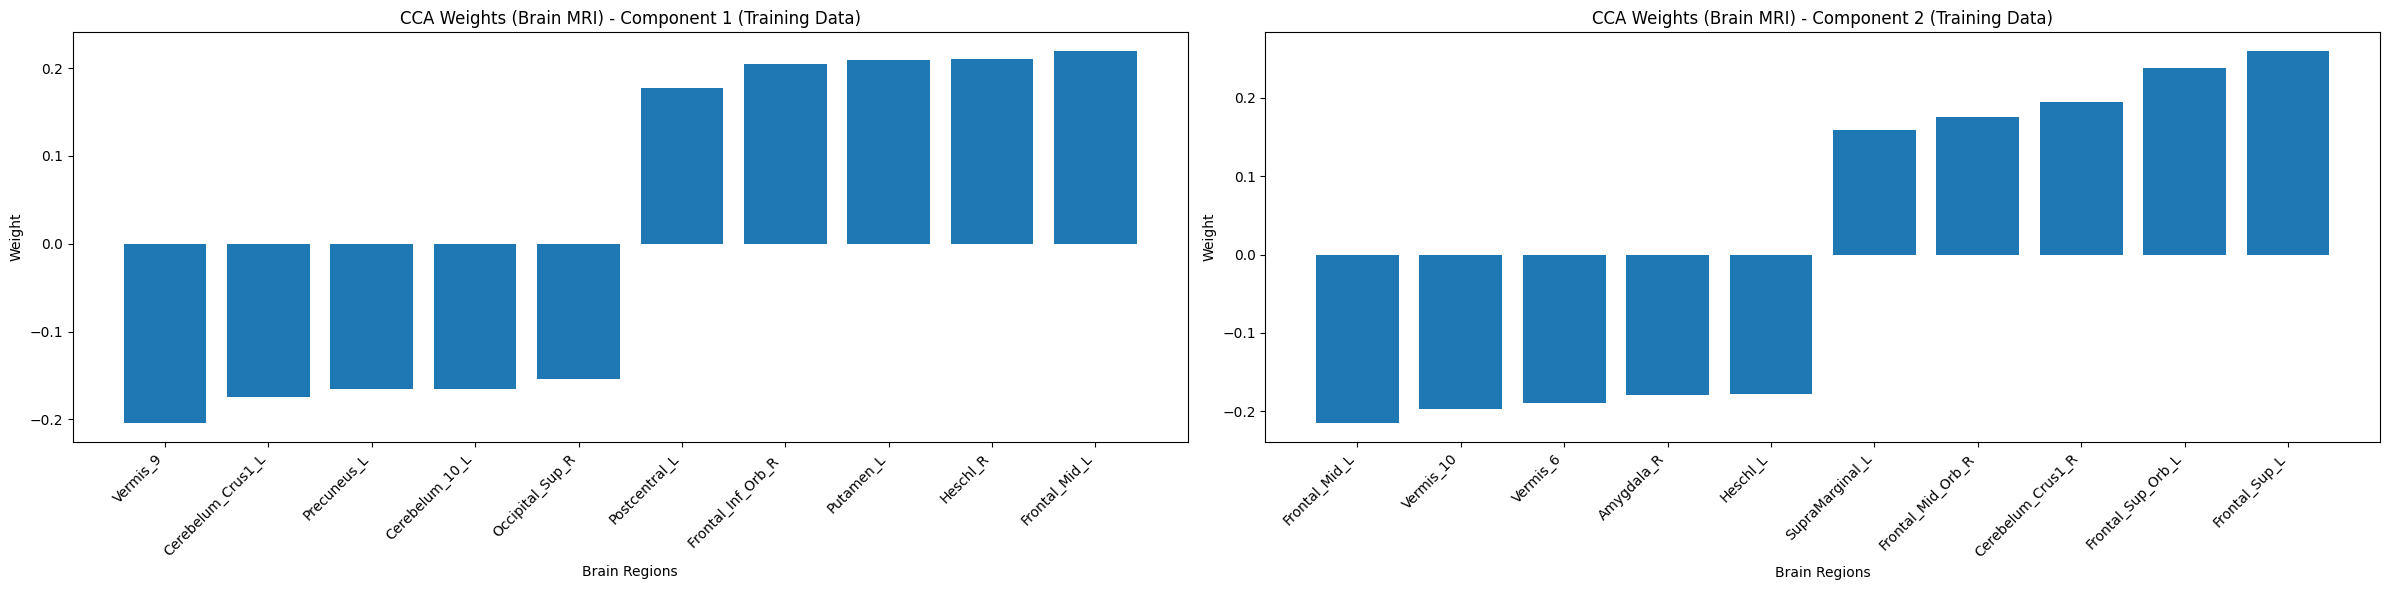

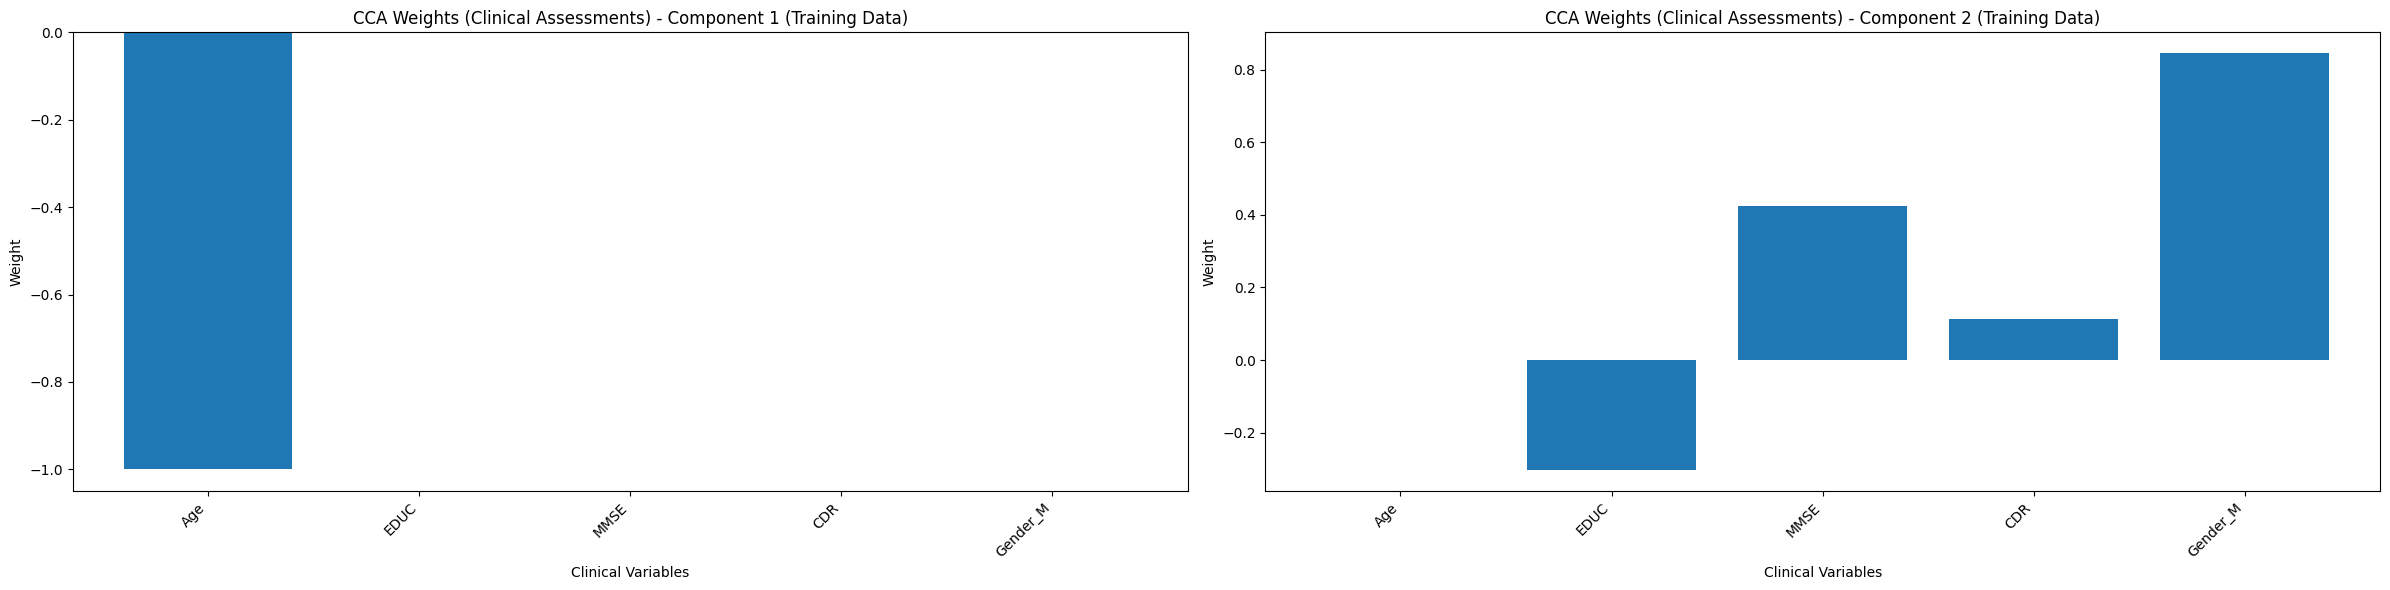

In [41]:
import matplotlib.pyplot as plt
import numpy as np

brain_weights = cca.x_weights_
clinical_weights = cca.y_weights_

# Function to select top N positive and negative coefficients
def select_top_coefficients(weights, names, n=5):
    indices_pos = np.argsort(weights)[-n:]  # Indices of top n positive weights
    indices_neg = np.argsort(weights)[:n]   # Indices of top n negative weights
    indices = np.concatenate([indices_neg, indices_pos])
    return [names[i] for i in indices], weights[indices]

# Plotting adjustments for brain weights
plt.figure(figsize=(24, 6))
for i in range(2):  # Looping over the first two components
    names, top_weights = select_top_coefficients(brain_weights[:, i], brain_region_names)
    plt.subplot(1, 2, i+1)
    plt.bar(range(len(names)), top_weights, align="center")
    plt.xticks(range(len(names)), names, rotation=45, ha="right")  # Rotate names for better readability
    plt.xlabel('Brain Regions')
    plt.ylabel('Weight')
    plt.title(f'CCA Weights (Brain MRI) - Component {i+1} (Training Data)')

plt.tight_layout()
plt.show()

# Plotting adjustments for clinical weights, potentially keeping all components
plt.figure(figsize=(24, 6))
for i in range(2):  # Looping over the first two components
    plt.subplot(1, 2, i+1)
    plt.bar(range(len(clinical_variable_names)), clinical_weights[:, i], align="center")
    plt.xticks(range(len(clinical_variable_names)), clinical_variable_names, rotation=45, ha="right")
    plt.xlabel('Clinical Variables')
    plt.ylabel('Weight')
    plt.title(f'CCA Weights (Clinical Assessments) - Component {i+1} (Training Data)')

plt.tight_layout()
plt.show()


### Task 5 -  Plot the CCA latent space for the top 2 components

Correlation for Training Latent Dimension 1: 1.000
Correlation for Testing Latent Dimension 1: 0.343
Correlation for Training Latent Dimension 2: 1.000
Correlation for Testing Latent Dimension 2: 0.177


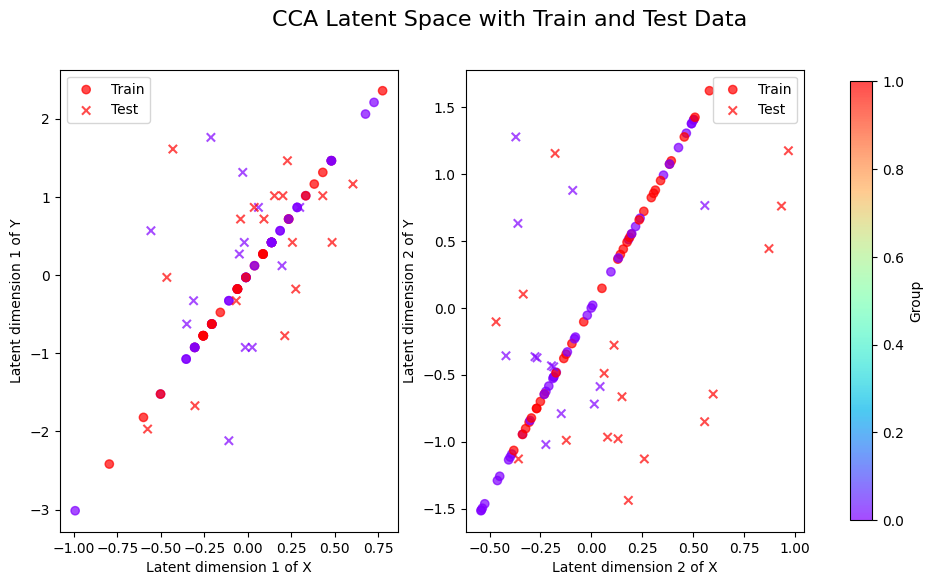

In [53]:
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming CCA has been performed and X_c_train, Y_c_train, X_c_test, Y_c_test are defined
# Also assuming CCA_n_components is defined as the number of components in your CCA model

# Use a single colormap for consistency
colormap = 'rainbow'

# Plot the latent dimensions for CCA
fig, axes = plt.subplots(1, CCA_n_components, figsize=(12, 6))

train_marker = 'o'  # Circle for training data
test_marker = 'x'   # Cross for testing data

# Initialize lists to store correlations
train_correlations = []
test_correlations = []

for i in range(CCA_n_components):
    # Plot for training data with label information
    scatter_train = axes[i].scatter(X_c_train[:, i], Y_c_train[:, i], c=train_labels, cmap=colormap, marker=train_marker, alpha=0.7, label='Train')
    # Plot for testing data with label information
    scatter_test = axes[i].scatter(X_c_test[:, i], Y_c_test[:, i], c=test_labels, cmap=colormap, marker=test_marker, alpha=0.7, label='Test')

    axes[i].set_xlabel(f"Latent dimension {i+1} of X")
    axes[i].set_ylabel(f"Latent dimension {i+1} of Y")
    axes[i].legend()

    # Calculate and store correlation for each component
    train_corr = np.corrcoef(X_c_train[:, i], Y_c_train[:, i])[0, 1]
    test_corr = np.corrcoef(X_c_test[:, i], Y_c_test[:, i])[0, 1]
    train_correlations.append(train_corr)
    test_correlations.append(test_corr)

    # Optionally print the correlations
    print(f"Correlation for Training Latent Dimension {i+1}: {train_corr:.3f}")
    print(f"Correlation for Testing Latent Dimension {i+1}: {test_corr:.3f}")

# Create a color bar for the 'Group' label
cbar = plt.colorbar(scatter_train, ax=axes.ravel().tolist(), shrink=0.95)
cbar.set_label('Group')

fig.suptitle("CCA Latent Space with Train and Test Data", fontsize=16)
plt.show()


### Task 6 - Apply PLSSVD to the brain and clinical dataset and plot the two first PLSSVD components (brain and clinical)

In [43]:
PLSSVD_n_components = 2
# Create PLSSVD object with n_components=3
plssvd = PLSSVD(n_components=PLSSVD_n_components)

# Fit PLSSVD model on X (brain_roi) and Y (clinical)
plssvd.fit(train_brain_roi, train_clinical)

# Transform both X and Y into their latent representations using PLSSVD
X_p_train, Y_p_train = plssvd.transform(train_brain_roi, train_clinical)
X_p_test, Y_p_test = plssvd.transform(test_brain_roi, test_clinical)

In [44]:
X_p_train.shape, Y_p_train.shape

((70, 2), (70, 2))

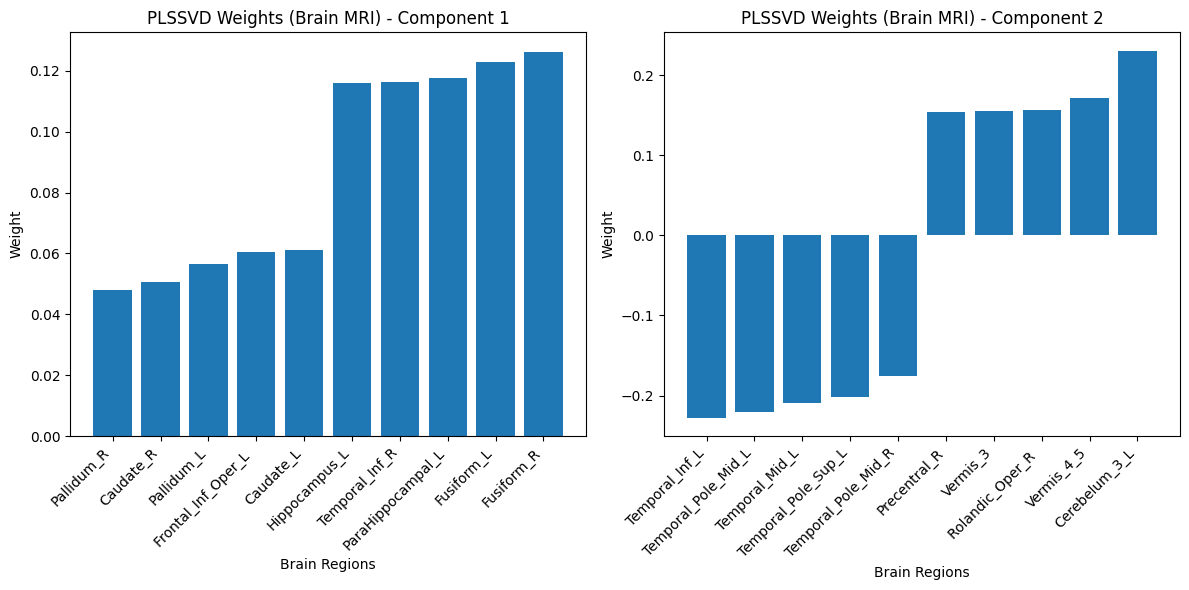

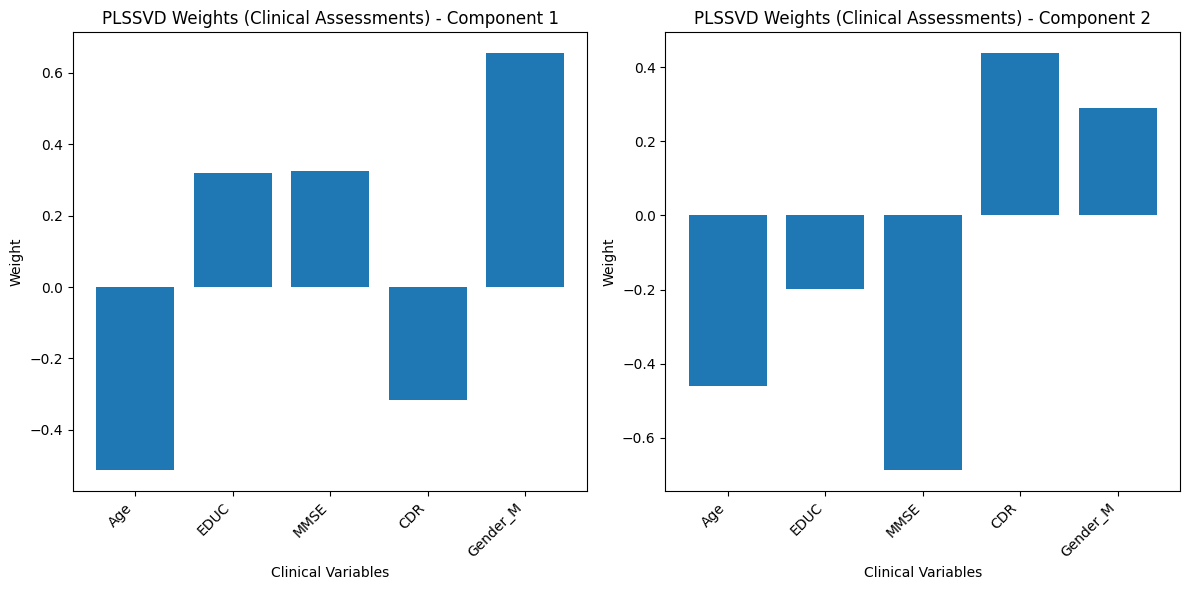

In [45]:
# add code to plot the PLSSVD weights as bar plots

# Extract PLSSVD weights for brain MRI and clinical assessments
brain_weights_pls = plssvd.x_weights_
clinical_weights_pls = plssvd.y_weights_

brain_region_names = brain_roi.columns.tolist()
clinical_variable_names = clinical.columns.tolist()

# Function to select top N positive and negative coefficients for plotting
def select_top_coefficients(weights, names, n=5):
    indices_pos = np.argsort(weights)[-n:]  # Indices of top n positive weights
    indices_neg = np.argsort(weights)[:n]   # Indices of top n negative weights
    indices = np.concatenate([indices_neg, indices_pos])
    return [names[i] for i in indices], weights[indices]

# Adjust plots for brain weights with feature names
plt.figure(figsize=(12, 6))
for i in range(2):  # Looping over the first two components
    names, top_weights = select_top_coefficients(brain_weights_pls[:, i], brain_region_names)
    plt.subplot(1, 2, i+1)
    plt.bar(names, top_weights, align="center")
    plt.xticks(rotation=45, ha="right")  # Rotate names for better readability
    plt.xlabel('Brain Regions')
    plt.ylabel('Weight')
    plt.title(f'PLSSVD Weights (Brain MRI) - Component {i+1}')

plt.tight_layout()
plt.show()

# Plot for clinical weights with feature names, keeping all components
plt.figure(figsize=(12, 6))
for i in range(2):  # Looping over the first two components
    plt.subplot(1, 2, i+1)
    plt.bar(clinical_variable_names, clinical_weights_pls[:, i], align="center")
    plt.xticks(rotation=45, ha="right")  # Rotate names for better readability
    plt.xlabel('Clinical Variables')
    plt.ylabel('Weight')
    plt.title(f'PLSSVD Weights (Clinical Assessments) - Component {i+1}')

plt.tight_layout()
plt.show()



### Task 7 -  Plot the CCA lantent space for the top 2 components

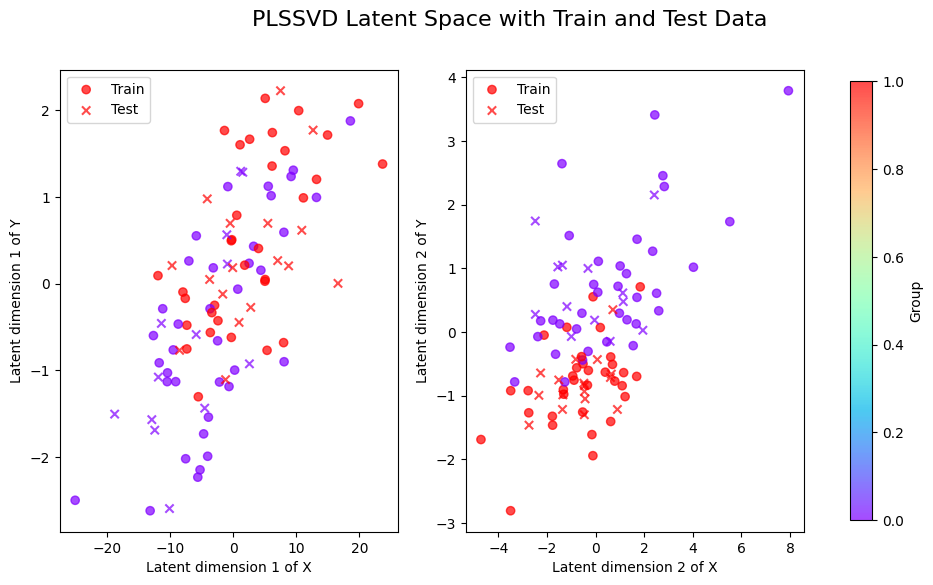

Correlation for Training Latent Dimension 1: 0.707
Correlation for Testing Latent Dimension 1: 0.649
Correlation for Training Latent Dimension 2: 0.615
Correlation for Testing Latent Dimension 2: 0.214


In [54]:
from sklearn.cross_decomposition import PLSSVD
import matplotlib.pyplot as plt
import numpy as np

# Use a single colormap for consistency
colormap = 'rainbow'

# Adjusting subplot creation for the possibility of having just one component
if PLSSVD_n_components == 1:
    fig, axes = plt.subplots(1, PLSSVD_n_components, figsize=(12, 6))
    axes = [axes]  # Make it iterable
else:
    fig, axes = plt.subplots(1, PLSSVD_n_components, figsize=(12, 6))

train_marker = 'o'  # Circle for training data
test_marker = 'x'   # Cross for testing data

# Initialize lists to store correlations
train_correlations = []
test_correlations = []

for i in range(PLSSVD_n_components):
    # Plot for training data with label information
    scatter_train = axes[i].scatter(X_p_train[:, i], Y_p_train[:, i], c=train_labels, cmap=colormap, marker=train_marker, alpha=0.7, label='Train')
    # Plot for testing data with label information
    scatter_test = axes[i].scatter(X_p_test[:, i], Y_p_test[:, i], c=test_labels, cmap=colormap, marker=test_marker, alpha=0.7, label='Test')

    axes[i].set_xlabel(f"Latent dimension {i+1} of X")
    axes[i].set_ylabel(f"Latent dimension {i+1} of Y")
    axes[i].legend()

    # Calculate and store correlation for each component
    train_corr = np.corrcoef(X_p_train[:, i], Y_p_train[:, i])[0, 1]
    test_corr = np.corrcoef(X_p_test[:, i], Y_p_test[:, i])[0, 1]
    train_correlations.append(train_corr)
    test_correlations.append(test_corr)

# Create a color bar for the 'Group' label
cbar = plt.colorbar(scatter_train, ax=axes if PLSSVD_n_components > 1 else [axes], shrink=0.95)
cbar.set_label('Group')

fig.suptitle("PLSSVD Latent Space with Train and Test Data", fontsize=16)
plt.show()

# Print correlations for each latent dimension
for i in range(PLSSVD_n_components):
    print(f"Correlation for Training Latent Dimension {i+1}: {train_correlations[i]:.3f}")
    print(f"Correlation for Testing Latent Dimension {i+1}: {test_correlations[i]:.3f}")


### Task 8 - Now apply PCA to the brain and clinical data idependently and plot both:
- The first two PCA components
- The PCA latent space for the two first components

In [47]:
# Number of components for PCA
PCA_n_components = 2

# PCA for brain data
pca_brain = PCA(n_components=PCA_n_components)
pca_brain.fit(train_brain_roi)
X_brain_pca = pca_brain.transform(train_brain_roi)

#### Plotting PCA components (brain data)

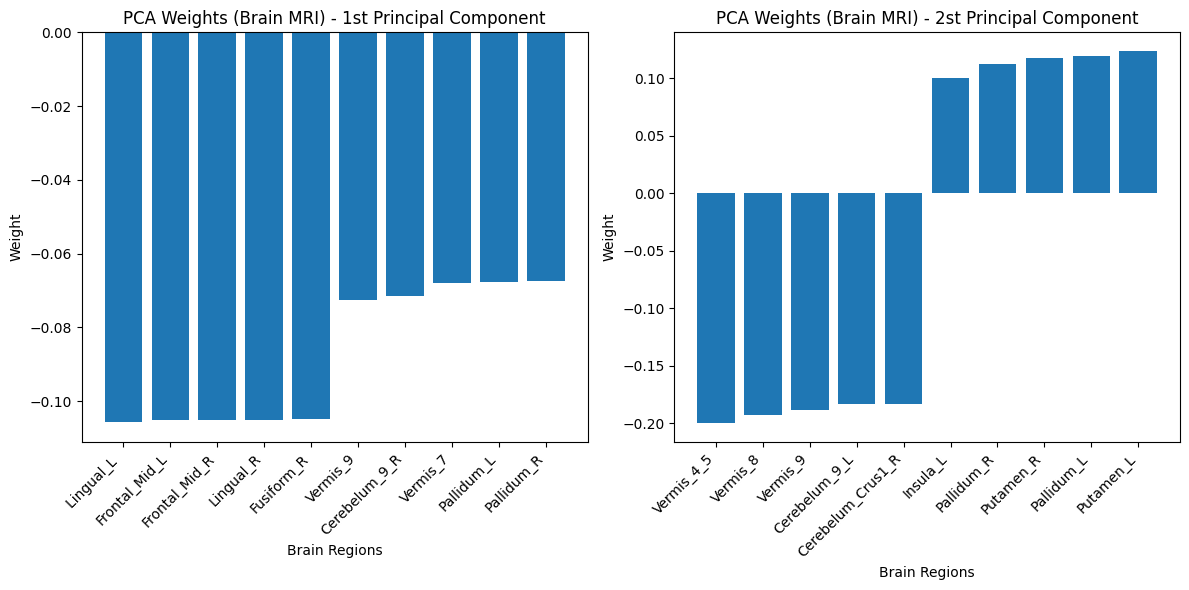

In [48]:
brain_pca_weights = pca_brain.components_

brain_region_names = brain_roi.columns.tolist()

# Function to select top N positive and negative coefficients for plotting
def select_top_coefficients(weights, names, n=5):
    indices_pos = np.argsort(weights)[-n:]  # Indices of top n positive weights
    indices_neg = np.argsort(weights)[:n]   # Indices of top n negative weights
    indices = np.concatenate([indices_neg, indices_pos])
    return [names[i] for i in indices], weights[indices]

# Adjust plots for brain PCA weights with feature names
plt.figure(figsize=(12, 6))
for i in range(2):  # Looping over the first two principal components
    names, top_weights = select_top_coefficients(brain_pca_weights[i], brain_region_names)
    plt.subplot(1, 2, i+1)
    plt.bar(names, top_weights, align="center")
    plt.xticks(rotation=45, ha="right")  # Rotate names for better readability
    plt.xlabel('Brain Regions')
    plt.ylabel('Weight')
    plt.title(f'PCA Weights (Brain MRI) - {i+1}st Principal Component')

plt.tight_layout()
plt.show()


#### Plotting PCA latent components (brain data)

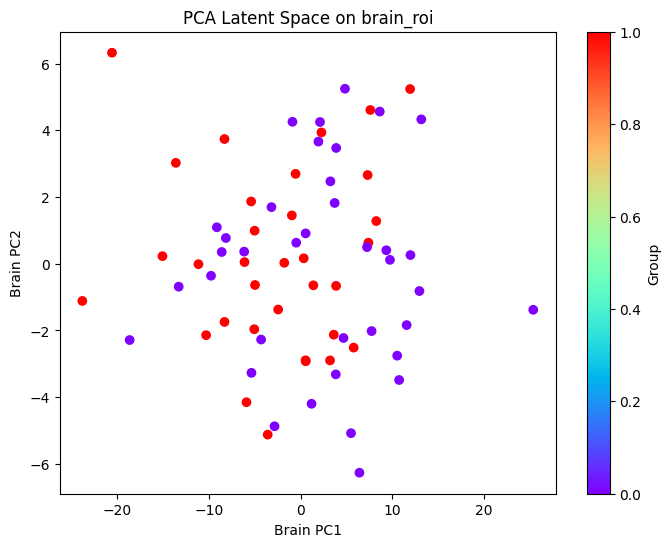

In [49]:

# Plot brain principal components as a scatter plot
plt.figure(figsize=(8, 6))
# Use train_labels directly if it's correctly formatted as a Series or array
plt.scatter(X_brain_pca[:, 0], X_brain_pca[:, 1], c=train_labels, cmap='rainbow')
plt.xlabel("Brain PC1")
plt.ylabel("Brain PC2")
plt.title("PCA Latent Space on brain_roi")
plt.colorbar(label='Group')
plt.show()


In [50]:
# Perform PCA on clinical variables
PCA_n_components = 2

pca_clinical = PCA(n_components=PCA_n_components)
pca_clinical.fit(train_clinical)
X_clinical_pca = pca_clinical.transform(train_clinical)

#### Plotting PCA components (clinical data)

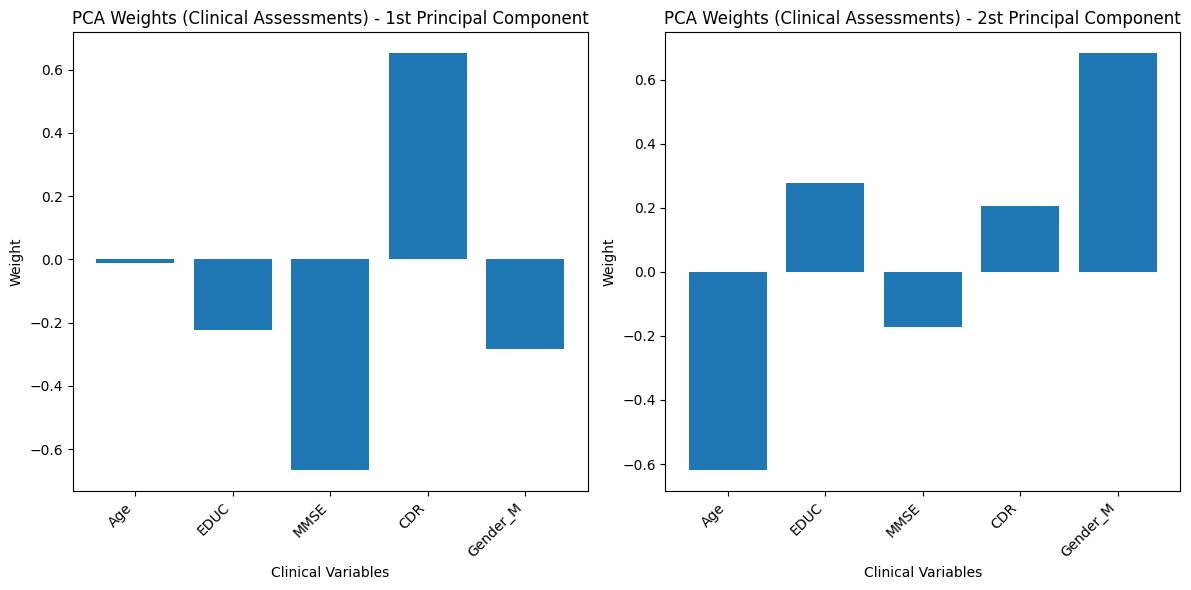

In [51]:
import matplotlib.pyplot as plt

clinical_pca_weights = pca_clinical.components_

# Assuming clinical DataFrame has columns with the feature names
clinical_variable_names = clinical.columns.tolist()

# Plotting adjustments for clinical PCA weights with feature names
plt.figure(figsize=(12, 6))
for i in range(2):  # Looping over the first two principal components
    plt.subplot(1, 2, i+1)
    plt.bar(clinical_variable_names, clinical_pca_weights[i], align="center")
    plt.xticks(rotation=45, ha="right")  # Rotate names for better readability
    plt.xlabel('Clinical Variables')
    plt.ylabel('Weight')
    plt.title(f'PCA Weights (Clinical Assessments) - {i+1}st Principal Component')

plt.tight_layout()
plt.show()



#### Plotting PCA latent components (clinical data)

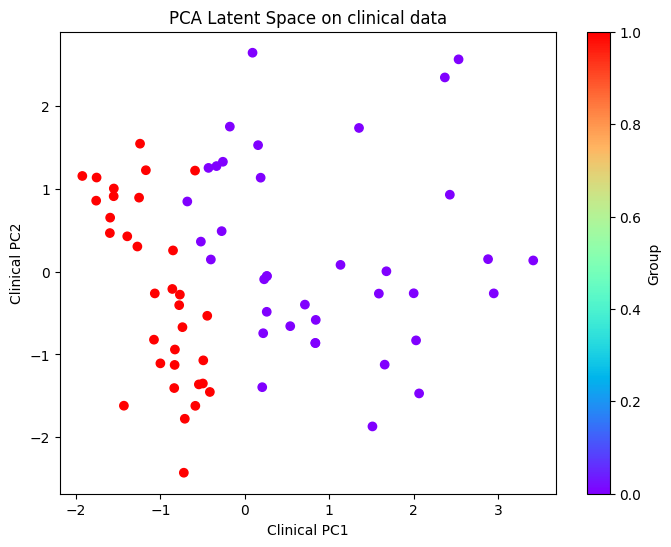

In [52]:
# Plot clinical principal components as a scatter plot
plt.figure(figsize=(8, 6))
# Use train_labels directly if it's correctly formatted as a Series or array
plt.scatter(X_clinical_pca[:, 0], X_clinical_pca[:, 1], c=train_labels, cmap='rainbow')
plt.xlabel("Clinical PC1")
plt.ylabel("Clinical PC2")
plt.title("PCA Latent Space on clinical data")
plt.colorbar(label='Group')
plt.show()
